# Trabalho Final - Ciência de Dados - Enap / 2021

## Roteiro de investigação.

## Aluno: William Lapa Santos Filho

### Apresentação do Dataset:

#### Tratam-se de base dados PÚBLICA coletada obtidas dos valores agregados por município das Declarações de Imposto de Renda da Pessoa Física (DIRPF) hospedadas no portal Grandes Números DIRPF elaborado pelo CETAD (Centro de Estudos Tributários e Aduaneiros) vinculado à Receita Federal do Brasil. Foram extraídas as informações das DIRPFs entregues por município de jurisdição dos contribuintes dos anos-calendários de 2015 a 2018.
#### Fonte: https://receita.economia.gov.br/dados/receitadata/estudos-e-tributarios-e-aduaneiros/estudos-e-estatisticas/11-08-2014-grandes-numeros-dirpf/grandes-numeros-dirpf-capa

#### Também utilizaremos a base de população, PIB e PIB per Capita por município obtida no site do IBGE:  https://sidra.ibge.gov.br/

### Motivação Pessoal:

#### Tratam-se de informações relevantes para análise da evolução de rendimentos e bens declarados para a administração tributária federal, cujo escopo faz parte da minha atividade profissional. 

## Investigação:

### Hipóteses a serem testadas:

### 1) Existe uma correlação positiva em rendimentos totais declarados por contribuinte e o pib per capita de cada município.

### 2) Existe uma correlação positiva entre os rendimentos totais declarados, bens e direitos declarados, despesas com instrução e despesas médicas e o PIB dos municípios.

### 3) Os estados do Sudeste, normalmente apontados como os mais ricos do Brasil, são aqueles em que há o maior valor de Bens e Direitos Declarados e também deste valor por declarante.

### 4) A quantide de declarantes aumenta de forma proporcional ao crescimento da população em todos os estados.

## Importando as principais bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
!pip install tabulate

In [2]:
# Codigo para rodar no Colab caso necvessário.
#from google.colab import drive
#drive.mount('/content/drive/')

# Análise Informações DIRPF Agregadas


### Dataset - Importando a base de dados e realizando tratamento iniciais


In [3]:
# Importando a bse de dados da RFB
# fonte: https://receita.economia.gov.br/dados/receitadata/estudos-e-tributarios-e-aduaneiros/estudos-e-estatisticas/11-08-2014-grandes-numeros-dirpf
# Importando base de população do site IBGE: https://sidra.ibge.gov.br/

# As bases foram tratadas no notebook "Tratamento_bases" cuja cópia em PDF segue nesta pasta. 
# O notebook "Tratamento_bases" e as planilhas originais estão na pasta /dados originais.

# Para o Google
#decl = pd.read_csv('/content/drive/My Drive/TrabalhoFinal/dirpf2015_2018.csv')
#pop_mun = pd.read_csv('/content/drive/My Drive/TrabalhoFinal/pop_mun.csv')
#pop_uf= pd.read_csv('/content/drive/My Drive/TrabalhoFinal/pop_uf.csv')
#pib_mun= pd.read_csv('/content/drive/My Drive/TrabalhoFinal/pib_munic.csv')


decl = pd.read_csv('dirpf2015_2018.csv')
pop_mun = pd.read_csv('pop_mun.csv')
pop_uf= pd.read_csv('pop_uf.csv')
pib_mun= pd.read_csv('pib_munic.csv')

<h3 align="center"> Atributos utilizados no DataFrame </h3>
<p></p>
<img src="AtributosDataFrame.jpg">

In [4]:
# Elaborando DataFrame final contendo informações das DIRPFs, população, PIB e PIB per capita

# Cruzando dados de municípios (fonte: Receita Federal do Brasil) com pib per capita por municípios (fonte: IBGE)
df_pib = decl.merge(pib_mun, left_on='chave', right_on='chave', how='left')
df_pib = df_pib[['Qtde Declarantes', 'Instrução', 'Médicas', 'Bens e Direitos', 'ano',
       'Municipio_x', 'UF_x', 'chave', 'Total Rend',
       'Total Rend por declarante', 'Instrução por declarante',
       'Médicas por declarante', 'Bens e Direitos por declarante', 'Ano'
       , 'Código do Município', 'PIB x 1000',
       'PIB per capita x 1 ']]
df_pib.rename({'UF_x': 'UF', 'Municipio_x': 'Municipio', 'PIB per capita x 1 ':'PIB per capita x 1'},axis=1, inplace=True)
df_pib['chave_pop'] = df_pib['Municipio']+df_pib['UF']

# Cruzando dados de municípios (fonte: Receita Federal do Brasil) com População por municípios e por UF (fonte: IBGE)
df_pib = df_pib.merge(pop_mun, right_on='chave', left_on='chave_pop', how='left')
pd.options.display.float_format = '{:.2f}'.format
df_pib['ano'].astype(int)
del df_pib['UF_y']
del df_pib['chave_y']
del df_pib['chave_x']
del df_pib['Municipio_y']
del df_pib['Ano']
del df_pib['chave_pop']
df_pib.rename({'UF_x': 'UF', 'Municipio_x': 'Municipio'},axis=1, inplace=True)

# Ajustando as colunas de população a fim de mostra unica coluna de população por município e por ano:
df_pib['População'] = df_pib.apply(lambda x: x[f'Pop Mun {x.ano}'], axis=1)
df_pib.drop(['Pop Mun 2015', 'Pop Mun 2016', 'Pop Mun 2017', 'Pop Mun 2018'], axis=1, inplace=True)
df_pib['População'].astype(int, errors='ignore')

# Em razão da base do IBGE nao conter informaçõs de alguns municípios, iremos excluir as linhas NaN nas colunas com informações do IBGE
df_pib.dropna(subset=['Código do Município', 'PIB x 1000', 'PIB per capita x 1', 'População'], inplace=True, axis=0)

# Data Frame contendo informações de população e pib percapita
df_pib.head() 

,Qtde Declarantes,Instrução,Médicas,Bens e Direitos,ano,Municipio,UF,Total Rend,Total Rend por declarante,Instrução por declarante,Médicas por declarante,Bens e Direitos por declarante,Código do Município,PIB x 1000,PIB per capita x 1,População
0,884,544087.86,1332363.16,81259268.80,2015,ABADIA DE GOIAS,GO,46974653.07,53138.75,615.48,1507.20,91922.25,5200050.00,171701.65,21748.15,7895.00
1,572,108173.27,258484.35,75752528.36,2015,ABADIA DOS DOURADOS,MG,29753201.79,52016.09,189.11,451.90,132434.49,3100104.00,164480.42,23446.96,7015.00
2,926,776157.39,1313360.98,112458949.72,2015,ABADIANIA,GO,47339874.13,51122.97,838.18,1418.32,121445.95,5200100.00,289003.06,15994.41,18069.00
3,7246,14736743.17,22390491.54,246027102.31,2015,ABAETETUBA,PA,402850510.55,55596.26,2033.78,3090.05,33953.51,1500107.00,1192555.06,7927.59,150431.00
4,2157,883004.50,3011041.26,453803065.76,2015,ABAETE,MG,165166853.93,76572.49,409.37,1395.94,210386.22,3100203.00,339606.98,14429.87,23535.00


In [5]:
df_pib.describe()

,Qtde Declarantes,Instrução,Médicas,Bens e Direitos,ano,Total Rend,Total Rend por declarante,Instrução por declarante,Médicas por declarante,Bens e Direitos por declarante,Código do Município,PIB x 1000,PIB per capita x 1,População
count,22042.00,22042.00,22042.00,22042.00,22042.00,22042.00,22042.00,22042.00,22042.00,22042.00,22042.00,22042.00,22042.00,22042.00
mean,5179.17,3842480.45,13534226.55,1513200035.84,2016.50,513029751.97,59643.93,463.87,1279.44,128450.29,3257011.15,1165988.50,21570.10,37203.97
std,52684.15,38552802.58,192888780.53,29107344793.26,1.12,7517993191.60,20673.52,318.74,773.62,209916.23,984365.05,11523444.55,21446.49,218865.77
min,9.00,0.00,0.00,37250.00,2015.00,280827.31,21040.51,0.00,0.00,573.08,1100015.00,11501.40,3089.57,786.00
25%,273.00,81418.27,252565.55,16559434.68,2016.00,14023293.84,47532.10,243.64,806.99,44126.88,2512606.00,76818.26,9212.81,5469.25
50%,600.00,216798.11,687236.88,60071487.97,2017.00,33677217.67,56299.18,389.86,1172.46,105171.39,3146552.00,169641.65,16089.48,11560.00
75%,1737.00,842067.10,2422846.55,237879334.69,2017.75,109921079.82,67936.19,601.01,1620.28,180180.85,4119608.00,453336.47,26497.64,25080.75
max,3248241.00,2063372428.34,12348333267.49,2149146240806.77,2018.00,498025332808.36,975468.41,4710.42,46969.95,16014725.14,5300108.00,714683362.46,583171.85,12176866.00


## Análise exploratória dos dados

<h1 style='bold'>Hipótese 1: NÃO CONFIRMADA.</h1>

### Existe uma correlação positiva em rendimentos totais declarados por contribuinte e o pib per capita de cada município. Iremos testar essa hipótese no gráfico abaixo:

#### Observando o gráfico abaixo, observamos que o PIB per capita apresenta correlação baixa com os valores informados por declarante no Imposto de Renda da Pessoa Física. 

#### Trata-se de uma análise superficial, mas uma possível explicação seria a existência de municípios que apresentam valores do PIB per capita discrepantes em relação aos demais municípios do Brasil.

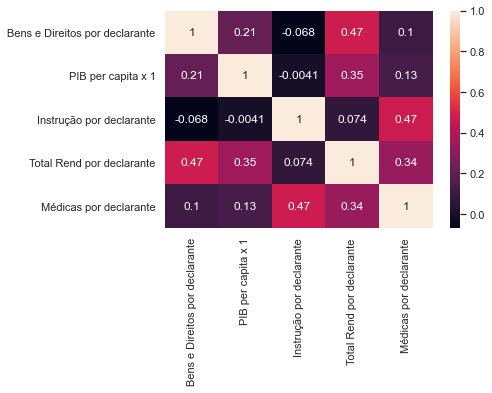

In [6]:
# Figura 1 - Heatmap das variáveis.
sns.set(style="darkgrid")
ax1 = sns.heatmap(df_pib[["Bens e Direitos por declarante", "PIB per capita x 1", "Instrução por declarante", "Total Rend por declarante", "Médicas por declarante"]].corr(), annot=True)

<h1 style='bold'>Hipótese 2: CONFIRMADA.</h1>

### Existe uma correlação positiva entre os rendimentos totais declarados, bens e direitos declarados, despesas com instrução e despesas médicas e o PIB dos municípios. Iremos testar essa hipótese no gráfico abaixo:

#### Observando o gráfico abaixo, observamos que o PIB dos municípios apresenta correlação bastante elevada com os valores informados na declaração do Imposto de Renda da Pessoa Física. 

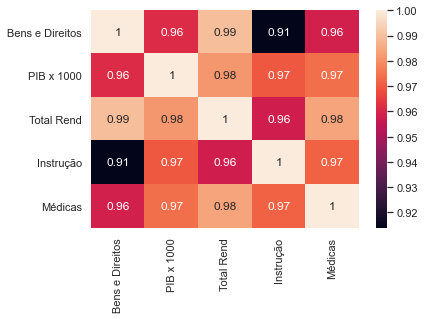

In [7]:
sns.set(style="darkgrid")
ax1 = sns.heatmap(df_pib[["Bens e Direitos", "PIB x 1000", "Total Rend", "Instrução", "Médicas"]].corr(), annot=True)

<h1 style='bold'>Hipótese 3: PARCIALMENTE CONFIRMADA.</h1>

#### Os estados do Sudeste, normalmente apontados como os mais ricos do Brasil, são aqueles em que há o maior valor de Bens e Direitos Declarados e também deste valor por declarante. Iremos testar essa hipótese abaixo.

##### Antes, porém é preciso realizar uma tranformação no Data Frame df_pib de modo a agrupar os valor por Unidade da Federação.

In [8]:
# Função GroupBy para agrupar por Unidade da Federação:
df_uf = df_pib.groupby(['UF', 'ano'], as_index=False).sum()

# Após a agrupamento, iremos criar nova coluna PIB per capita para as UFs por ano:
df_uf['Pib per Capita UF'] = df_uf['PIB x 1000']/df_uf['População']*1000

# Criando novas colunas dos Rendimentos por declarante para cada UF:
df_uf['Total Rend UF'] = df_uf['Total Rend']/df_uf['Qtde Declarantes']
df_uf['Bens e Direitos UF'] = df_uf['Bens e Direitos']/df_uf['Qtde Declarantes']
df_uf['Médicas UF'] = df_uf['Médicas']/df_uf['Qtde Declarantes']
df_uf['Instrução UF'] = df_uf['Instrução']/df_uf['Qtde Declarantes']

# Remoção das colunas sem interesse

df_uf = df_uf[['UF', 'ano', 'Qtde Declarantes', 'Instrução', 'Médicas',
       'Bens e Direitos', 'Total Rend','PIB x 1000',
       'População', 'Pib per Capita UF', 'Total Rend UF',
       'Bens e Direitos UF', 'Médicas UF', 'Instrução UF']]

#### No gráfico abaixo, observamos que 3 estados do Sudeste (SP, RJ e DF) são os 3 primeiros da lista dos bens e direitos por declarante de 2015 a 2018. Entretanto o estado de Minas Gerais vem após estados do Sul, Sergipe e Goiás.
#### Em relação ao estado do Sergipe, os valores mostrados sugerem discrepância, o q requer maiores análises para identificar as possíveis causas dessa variação. Essa análise não fará parte do escopo deste trabalho.

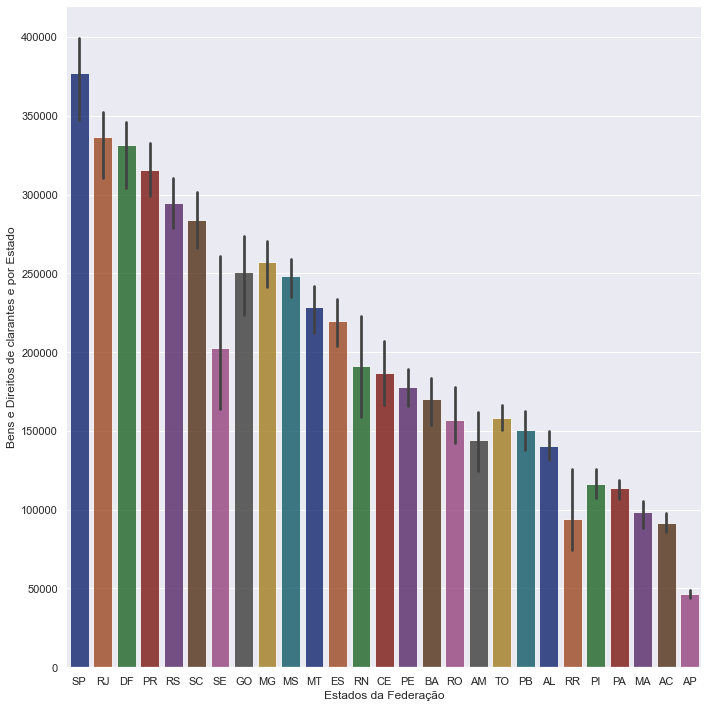

In [9]:
# Atribuindo valor decrescente ao dataframe df_pib para podermos ter uma visão melhor no gráfico:
df_sorted = df_uf.sort_values('Bens e Direitos UF', ascending=False)

# Código plotagem
g = sns.catplot(
    data=df_sorted, kind="bar",
    x="UF", y="Bens e Direitos UF",
     palette="dark", alpha=.8, height=10, hue_order=df_sorted.sort_values('Bens e Direitos UF')    
)
g.despine(left=True)
g.set_axis_labels("Estados da Federação", "Bens e Direitos de clarantes e por Estado")

<h1 style='bold'>Hipótese 4: CONFIRMADA.</h1>

#### A quantide de declarantes aumenta de forma proporcional ao crescimento da população em todos os estados.


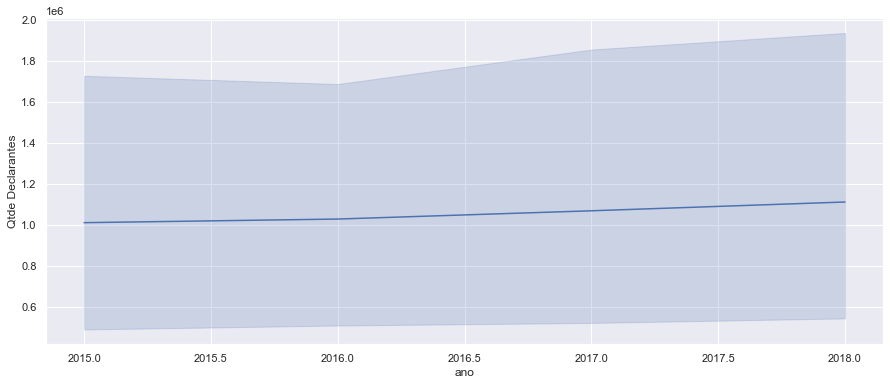

In [10]:
fig, ax1 = plt.subplots(1, 1, figsize=(15, 6))
sns.set(style="darkgrid")
ax1 = sns.lineplot(x='ano', y='Qtde Declarantes', data=df_uf)

### Código para utilizações futuras (Não considerar no trabalho final)

### Linhas abaixo fazem parte do ganho de conhecimento adquirido para a realização de novas análises em momento futuro.

### Gráifco PairPlot:

###sns.set(style="darkgrid")
###ax1= sns.pairplot(df_pib, hue="ano", x_vars=["Bens e Direitos por declarante", "PIB per capita x 1", "Instrução por declarante", "Bens e Direitos", "PIB x 1000", "Total Rend", "Instrução", "Médicas"],
    ####y_vars=["Bens e Direitos por declarante", "PIB per capita x 1", "Instrução por declarante", "Bens e Direitos", "PIB x 1000", "Total Rend", "Instrução", "Médicas"])

In [11]:
# Código para agrupar "n" mais ricos e "n" mais pobres:

teste = [2015, 2016, 2017, 2018]

def extremos(df, lista, n):
    df_pib.dropna()
    global result
    result = None    
    pieces = []
    df_ricos = pd.DataFrame()
    for i in lista:
        df1 = df_pib[df_pib['ano']==i].sort_values(by=['PIB per capita x 1', 'Total Rend por declarante'] , ascending=False).head(n)
        pieces.append(df1) 
        df2 = df_pib[df_pib['ano']==i].sort_values(by=['PIB per capita x 1', 'Total Rend por declarante'], ascending=False).tail(n)
        pieces.append(df2)            

    result = pd.concat(pieces, ignore_index=True)    

extremos(df_pib, teste, 5)

result.tail()


,Qtde Declarantes,Instrução,Médicas,Bens e Direitos,ano,Municipio,UF,Total Rend,Total Rend por declarante,Instrução por declarante,Médicas por declarante,Bens e Direitos por declarante,Código do Município,PIB x 1000,PIB per capita x 1,População
35,169,46349.52,47388.60,969475.06,2018,SANTO AMARO DO MARANHAO,MA,7750977.28,45863.77,274.26,280.41,5736.54,2110278.00,79255.22,5062.94,15654.00
36,153,60067.00,158626.48,3486587.92,2018,CAJAPIO,MA,7687448.45,50244.76,392.59,1036.77,22788.16,2102408.00,55350.92,4970.45,11136.00
37,165,53756.50,41463.87,1069811.45,2018,SANTANA DO MARANHAO,MA,6079865.73,36847.67,325.80,251.30,6483.71,2110237.00,64832.58,4903.02,13223.00
38,125,118954.63,137366.64,1449108.11,2018,PRIMEIRA CRUZ,MA,6406494.64,51251.96,951.64,1098.93,11592.86,2109403.00,74481.63,4901.07,15197.00
39,123,41643.72,69743.96,5244112.99,2018,MATOES DO NORTE,MA,5365614.15,43622.88,338.57,567.02,42635.06,2106631.00,78770.41,4788.18,16451.00


# Alteração da direção do eixo X:

fig, g = plt.subplots(1, 1, figsize=(15, 6))
plt.xticks(rotation=90)
g = sns.barplot(y="Total Rend por declarante", x="UF", hue='ano',           
             data=result)
